### EDA

In [1]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats
from numpy import sqrt

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
train = load_dataset('/Users/gerar/OneDrive/Escriptori/UNI/3r/1r SEMESTRE/APRENENTATGE COMPUTACIONAL/PRÀCTIQUES/PRÀCTICA 2/archive/train.csv')
data = train.values

x = data[:, :-1]
y = data[:, -1]

print("Dimensionalitat de la BBDD:", train.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de la BBDD: (2000, 21)
Dimensionalitat de les entrades X (2000, 20)
Dimensionalitat de l'atribut Y (2000,)


In [2]:
print("Per comptar el nombre de valors no existents:")
print(train.isnull().sum())

Per comptar el nombre de valors no existents:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [3]:
print("Per visualitzar les primeres 5 mostres de la BBDD:")
train.head()

Per visualitzar les primeres 5 mostres de la BBDD:


battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0        2.200         0   1       0           7  0.600   
1           1021     1        0.500         1   0       1          53  0.700   
2            563     1        0.500         1   2       1          41  0.900   
3            615     1        2.500         0   0       0          10  0.800   
4           1821     1        1.200         0  13       1          44  0.600   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [4]:
for i in train:
    print(train[i].dtypes)

int64
int64
float64
int64
int64
int64
int64
float64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64


<IPython.core.display.Javascript object>


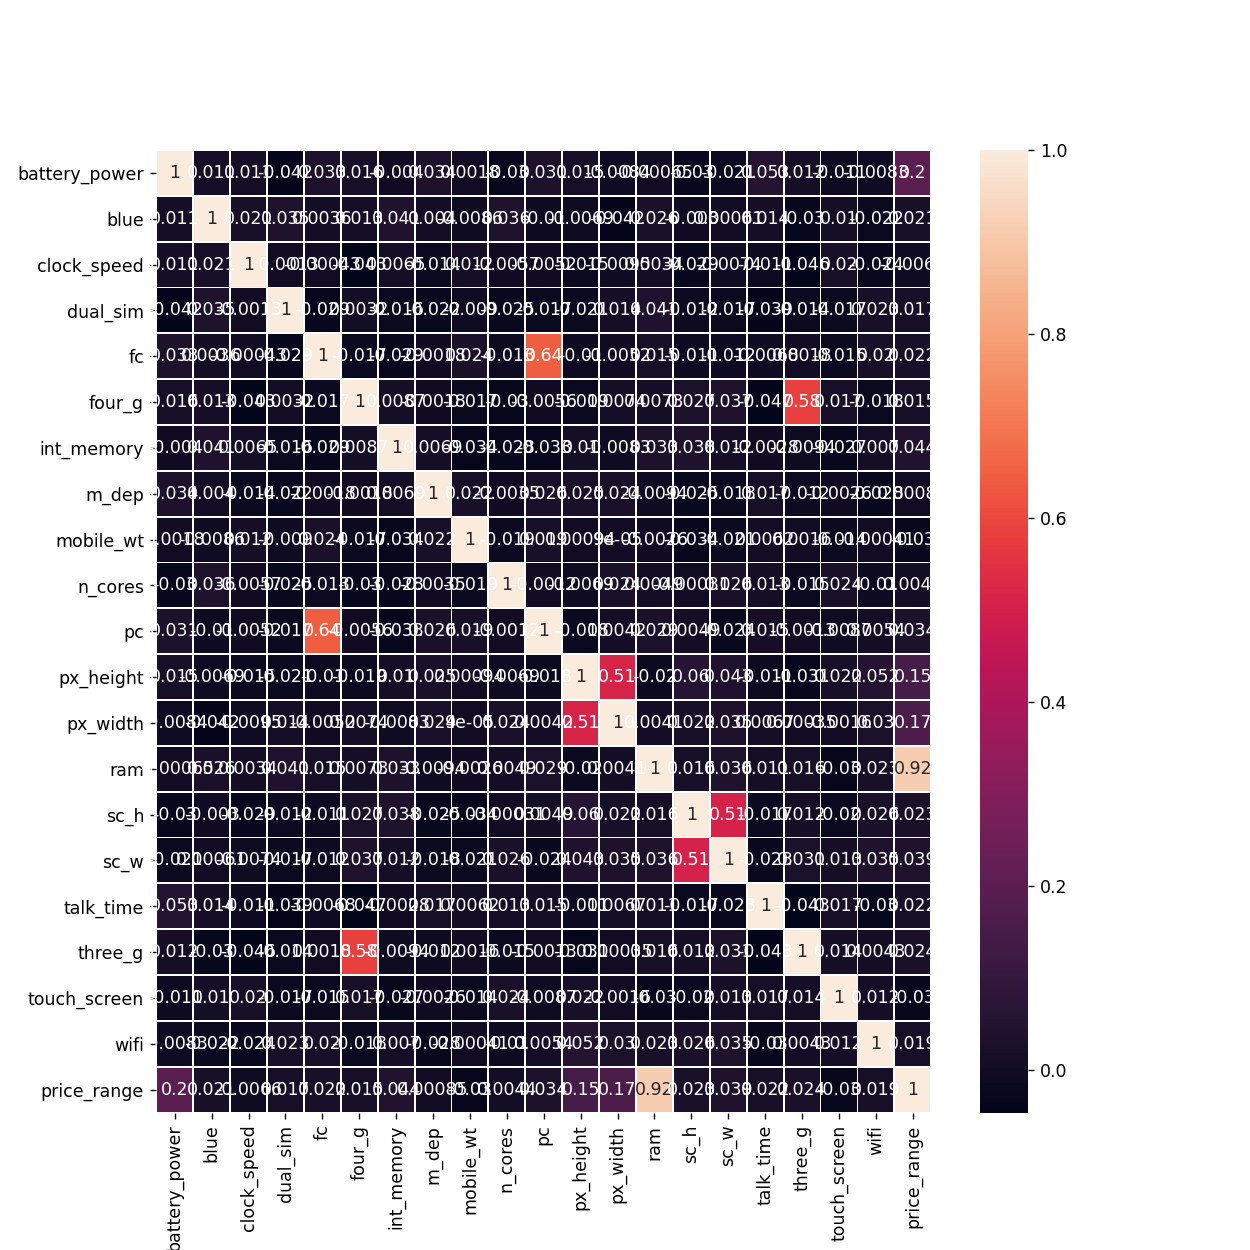

In [5]:
import seaborn as sns

# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = train.corr()

#plt.figure()

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
#sns.heatmap(dataset.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)

ax = sns.heatmap(correlacio, annot=True, linewidths=0.5, ax=ax)

battery_power


<IPython.core.display.Javascript object>


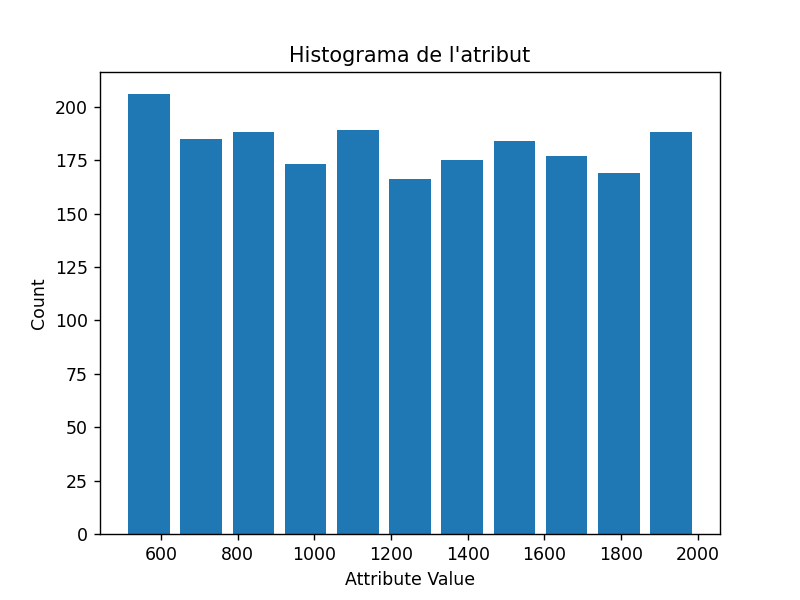

0
blue


<IPython.core.display.Javascript object>


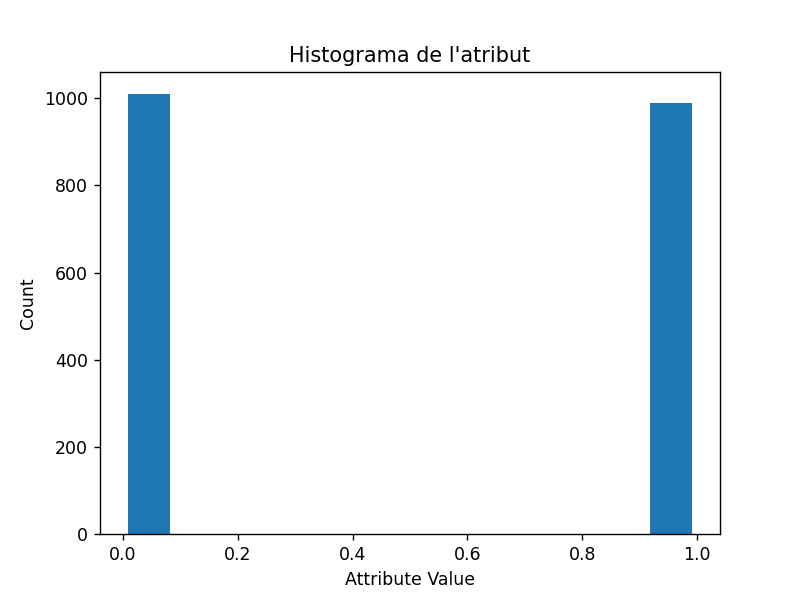

1
clock_speed


<IPython.core.display.Javascript object>


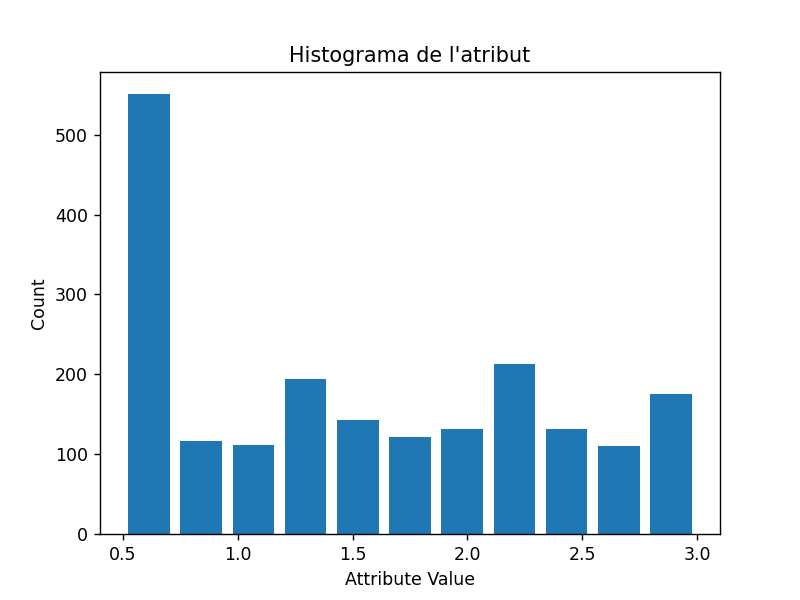

2
dual_sim


<IPython.core.display.Javascript object>


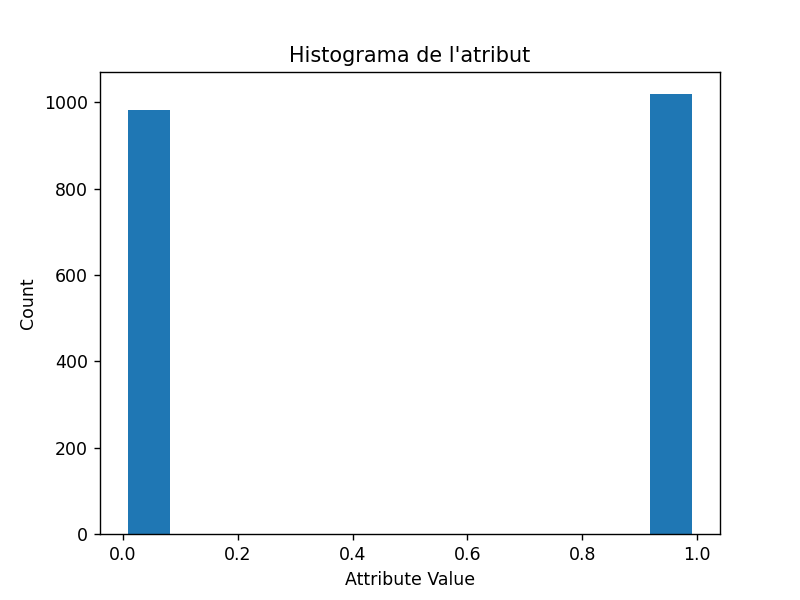

3
fc


<IPython.core.display.Javascript object>


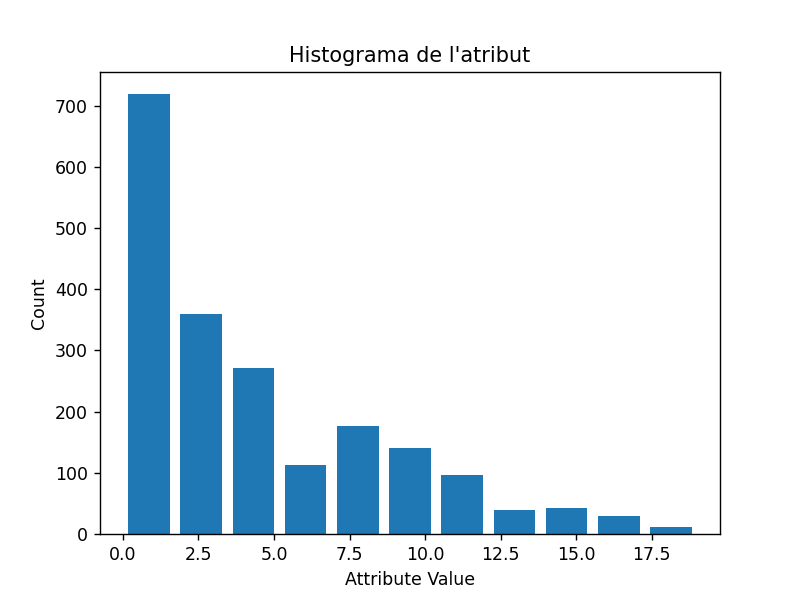

4
four_g


<IPython.core.display.Javascript object>


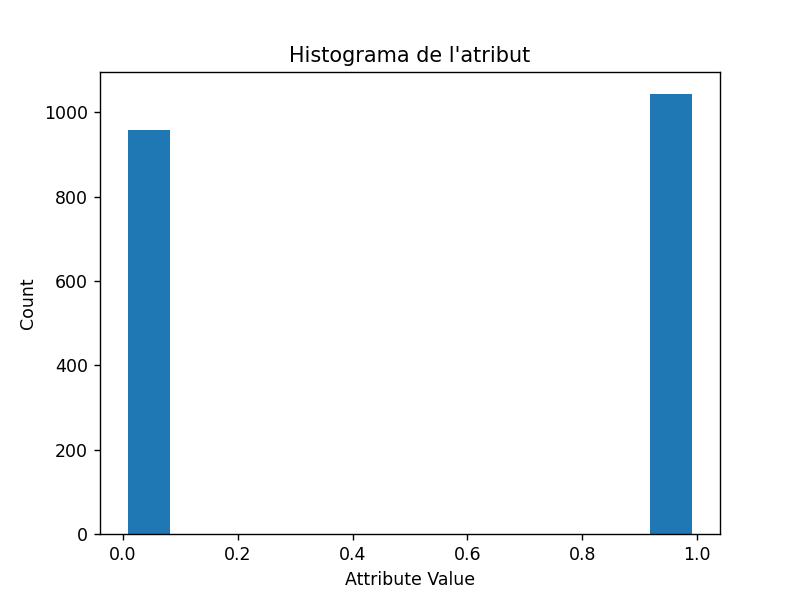

5
int_memory


<IPython.core.display.Javascript object>


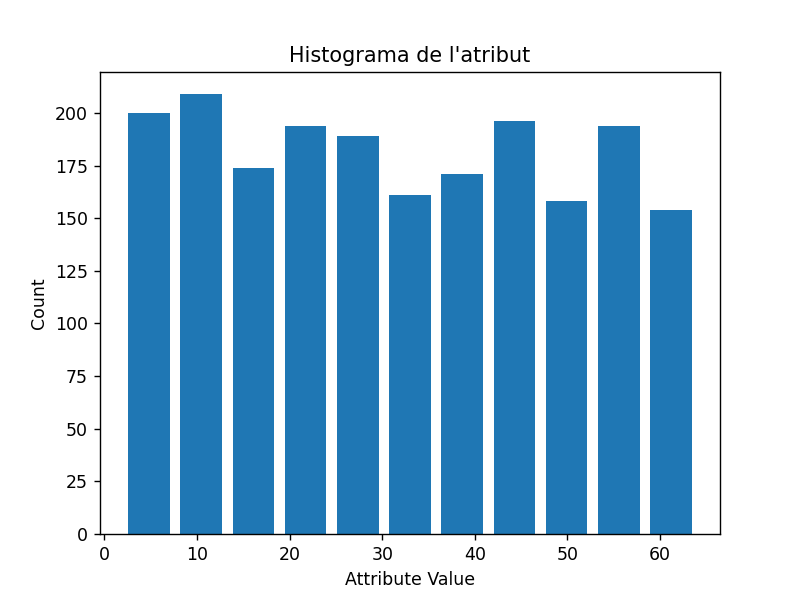

6
m_dep


<IPython.core.display.Javascript object>


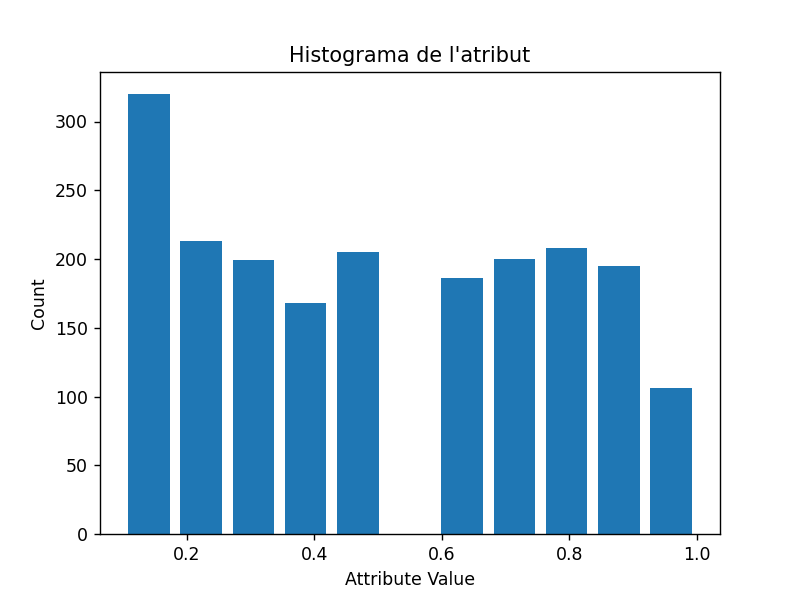

7
mobile_wt


<IPython.core.display.Javascript object>


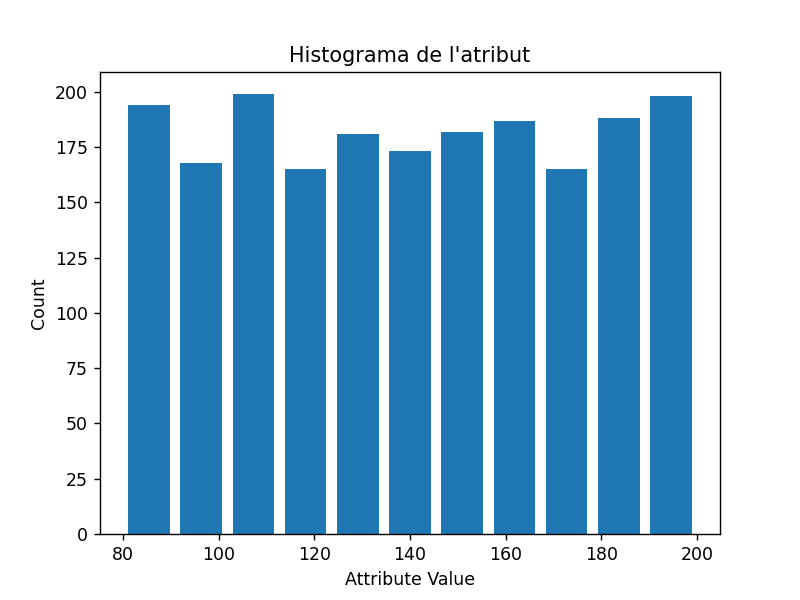

8
n_cores


<IPython.core.display.Javascript object>


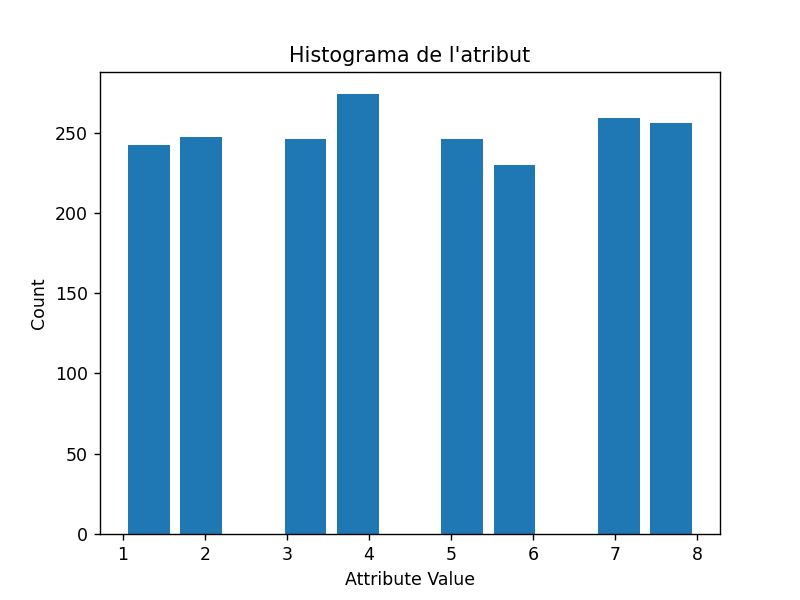

9
pc


<IPython.core.display.Javascript object>


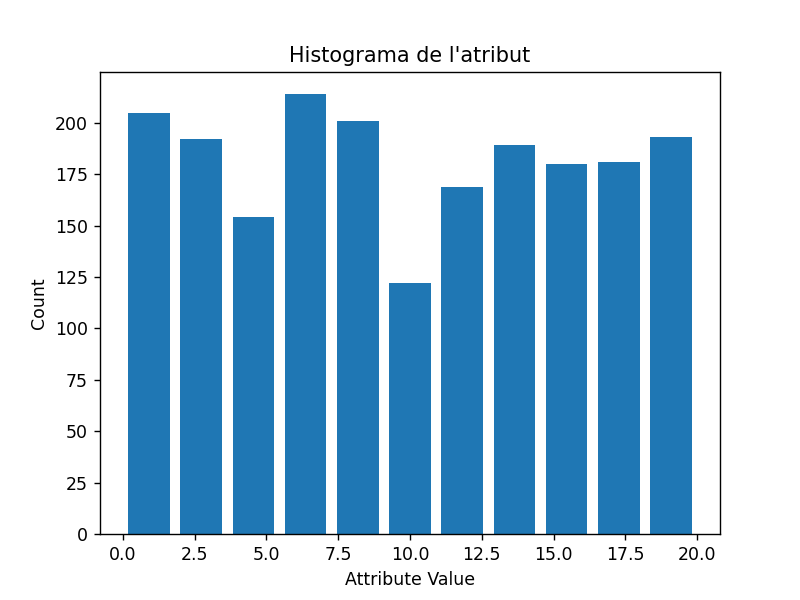

10
px_height


<IPython.core.display.Javascript object>


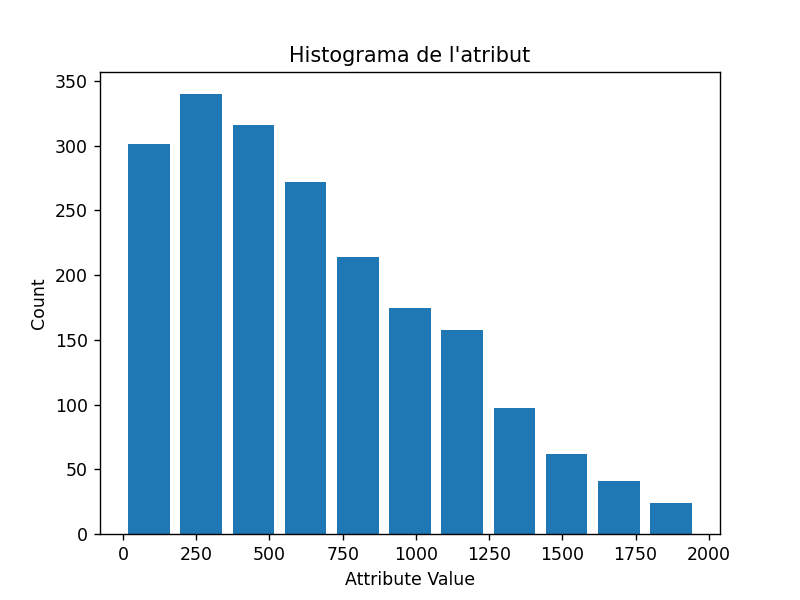

11
px_width


<IPython.core.display.Javascript object>


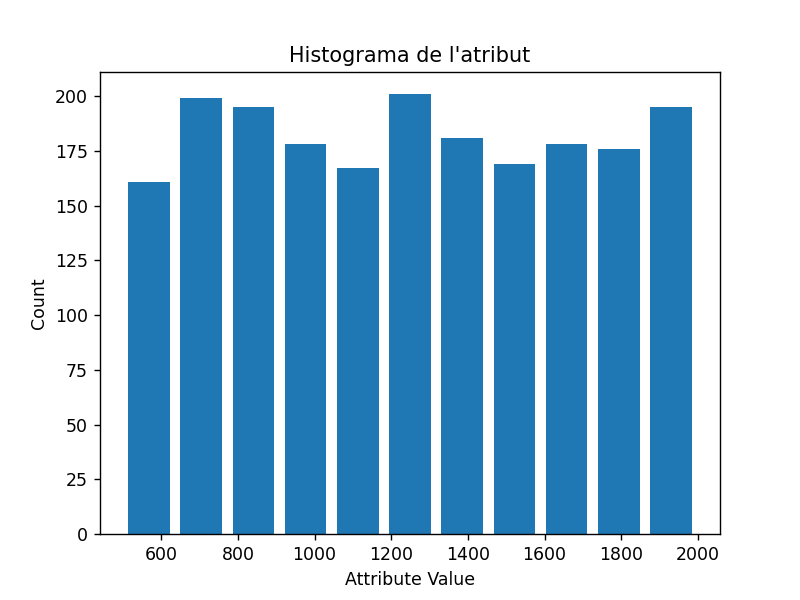

12
ram


<IPython.core.display.Javascript object>


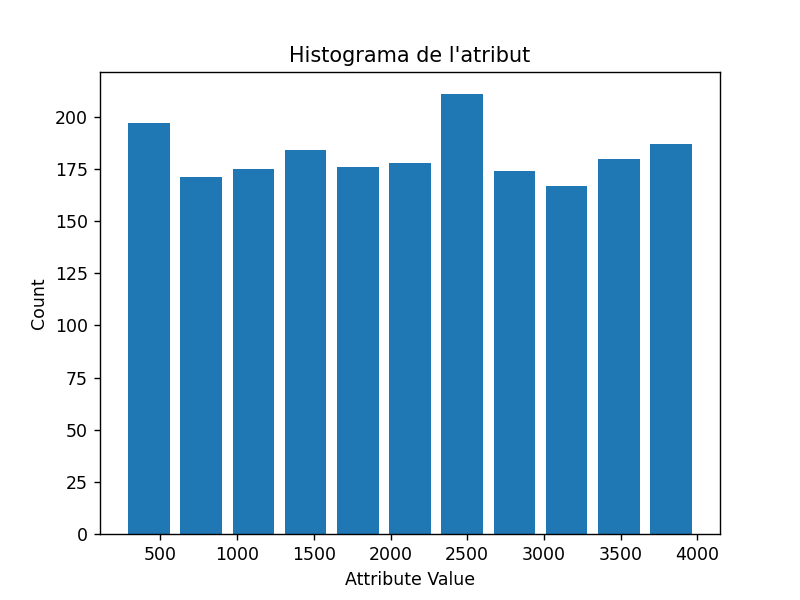

13
sc_h


<IPython.core.display.Javascript object>


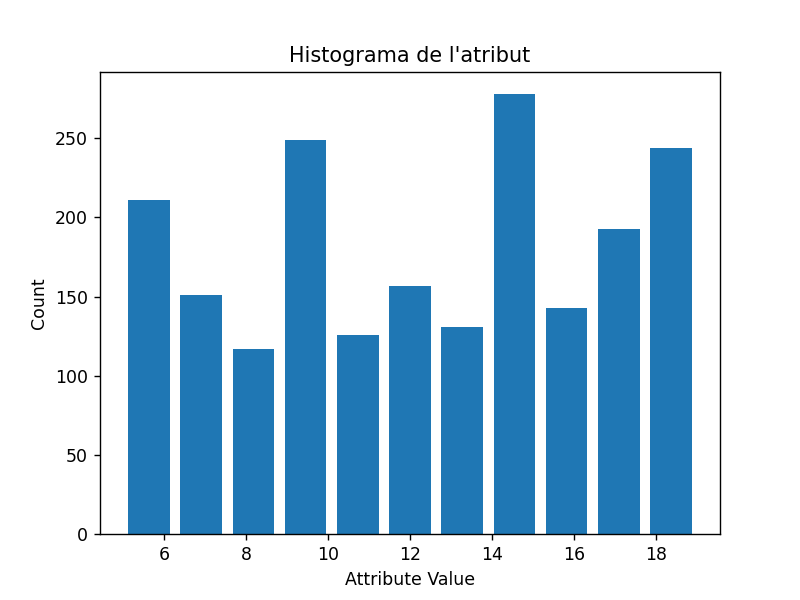

14
sc_w


<IPython.core.display.Javascript object>


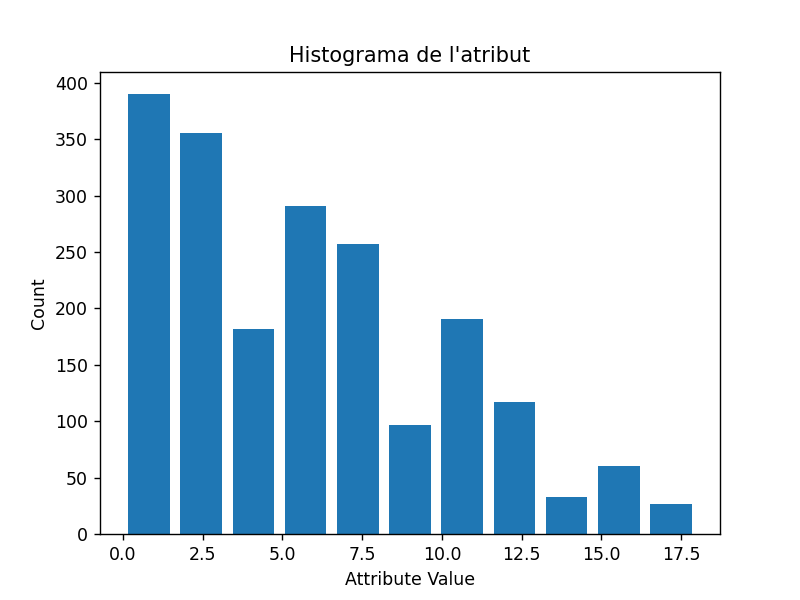

15
talk_time


<IPython.core.display.Javascript object>


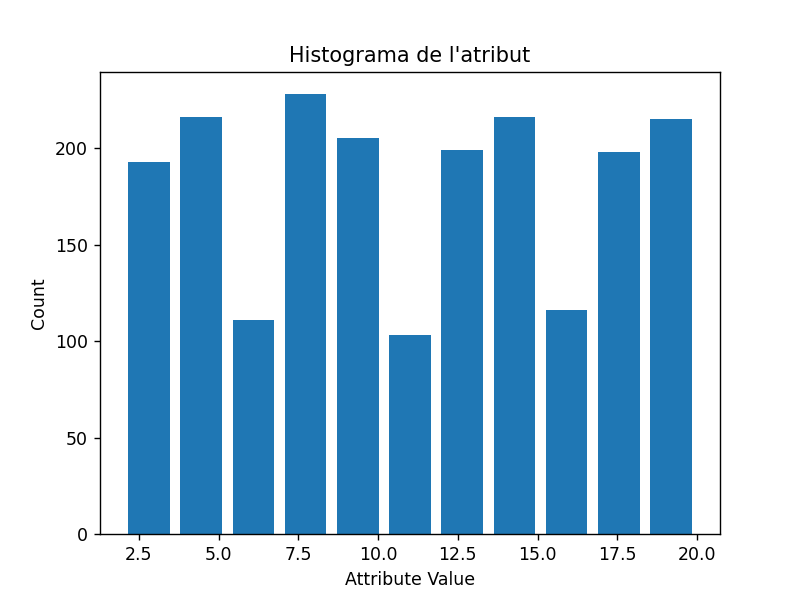

16
three_g


<IPython.core.display.Javascript object>


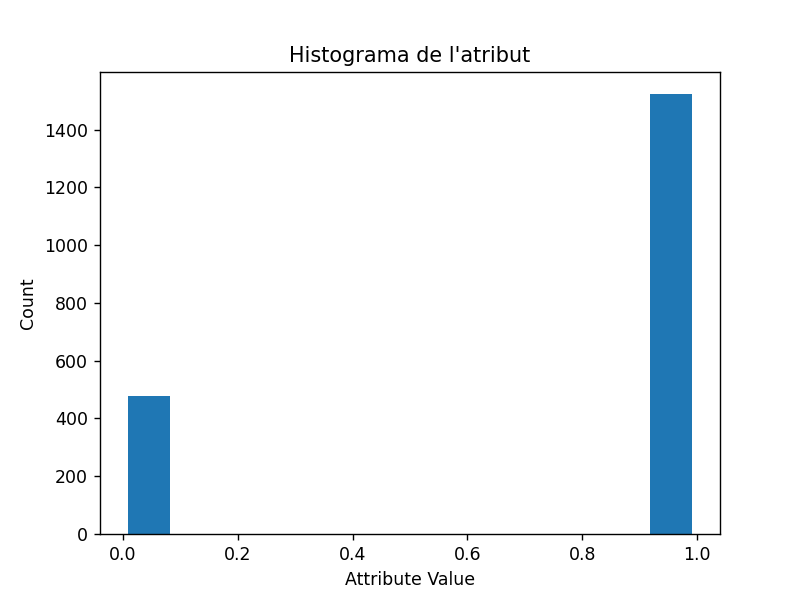

17
touch_screen


<IPython.core.display.Javascript object>


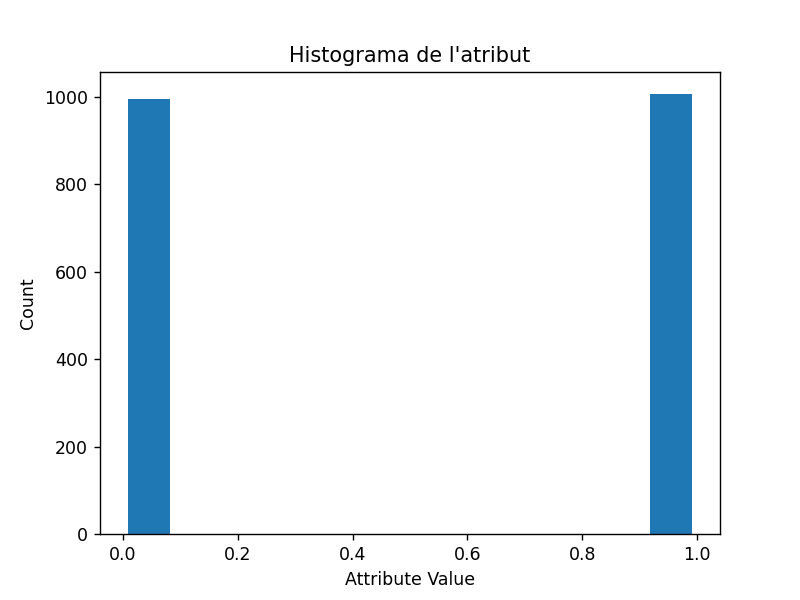

18
wifi


<ipython-input-6-30a8d1d1fbb3>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


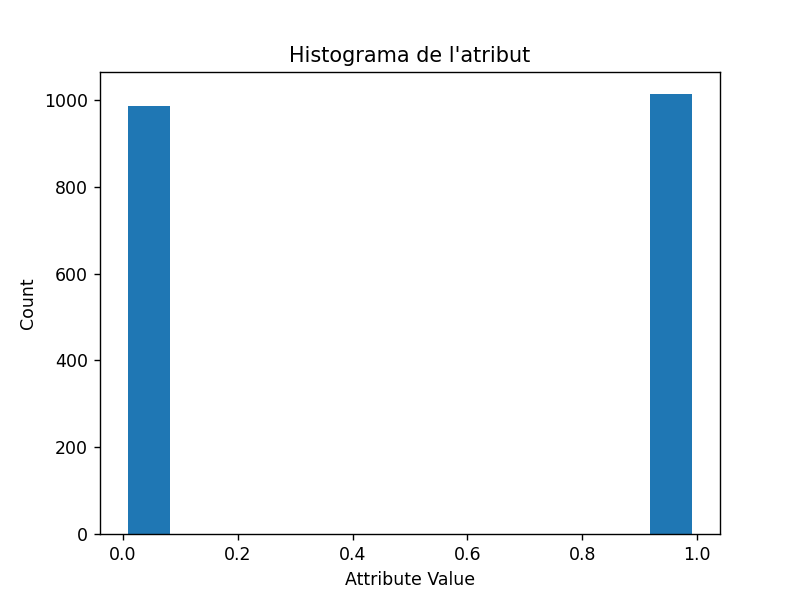

19


In [6]:
cols = [i for i in train.columns.values if i != "price_range"]
for i in range(len(cols)):
    print(cols[i])
    plt.figure()
    print(i)
    plt.title("Histograma de l'atribut")
    plt.xlabel("Attribute Value")
    plt.ylabel("Count")
    hist = plt.hist(data[:,i], bins=11, range=[np.min(data[:,i]), np.max(data[:,i])], histtype="bar", rwidth=0.8)

### 1. EDA (exploratory data analysis)

Igual com a la pràctica anterior, exploreu i visualitzeu com és la base de dades que teniu assignada.

**Preguntes:**
* Quants atributs té la vostra base de dades?
    - Tenim 21 atributs
* Quin tipus d'atributs tens? (Númerics, temporals, categorics, binaris...)
    - La gran majoria int64
* Com es el target, quantes categories diferents existeixen?
    - 4 categories
* Podeu veure alguna correlació entre X i y?
    - Sembla haver una correlació molt alta entre el preu i la ram (Correlacion lineal baja para casi todas las variables, moderada para batterypower, height y width, y elevada para ram)
* Estan balancejades les etiquetes (distribució similar entre categories)? Creus que pot afectar a la classificació la seva distribució?
    - La distribució entre les categories no sembla ser gaire similar, podem observar que hi ha categories que segueixen una distribució binària, d'altres una exponencial negativa, altres els valors semblen ser molt similars, etc. Això podria generar problemes especialment si tenim un conjunt de training amb unes distribucions molt diferents al conjunt de test

### 2. Preprocessing (normalitzation, outlier removal, feature selection..)
Un cop vistes les dades de les que es disposa, per tal de tenir un aprenentatge més eficient, es recomana normalitzar les dades i treure outliers. Segons la tipologia de dades, es poden filtrar atributs, aplicar-hi reductors de dimensionalitat, codificar categories textuals en valors numèrics..

Navegueu per la [documentació de sklearn sobre preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html) per tal de trobar les diferents opcions que proporciona sklearn.

**Preguntes:**
* Estàn les dades normalitzades? Caldria fer-ho?
    - No les dades no estàn normalitzades i seria important fer-ho ja que necessitem que es trobin dins d'un rang similar per a tenir una bona contribució dins l'anàlisi i que no generin biaix.
* En cas que les normalitzeu, quin tipus de normalització será més adient per les vostres dades?
    - La normalització més adient sembla ser la normalització estàndard on estandaritzem les característiques eliminant la mitjana i escalant a la variància de la unitat.
* Teniu gaires dades sense informació? Els NaNs a pandas? Tingueu en compte que hi ha metodes que no els toleren durant el aprenentatge. Com afecta a la classificació si les filtrem? I si les reompliu? Com ho farieu? [Pista](https://scikit-learn.org/stable/modules/impute.html)
    - En la nostra base de dades no sembla que tinguem cap dada sense informació, per tant, no hauria de afectar al nostre model d'aprenentatge i la seva classificació
* Teniu dades categoriques? Quina seria la codificació amb més sentit? (`OrdinalEncoder`, `OneHotEncoder`, d'altres?)
    - No tenim dades categoriques
* Caldria aplicar `sklearn.decomposition.PCA`? Quins beneficis o inconvenients trobarieu?
* Es poden aplicar `PolynomialFeatures` per millorar la classificació? En quins casos té sentit fer-ho?

In [7]:
# Load data
y_train = train['price_range']
cols = ['battery_power','ram','px_height','px_width']
X_train = train[cols].copy()

In [8]:
X_train[cols[0]]

0        842
1       1021
2        563
3        615
4       1821
        ... 
1995     794
1996    1965
1997    1911
1998    1512
1999     510
Name: battery_power, Length: 2000, dtype: int64

In [11]:
# Normalization of features in the range of [0, 1]
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
vals = poly.fit_transform(X_train.iloc[:,0:2].values)

scaler = StandardScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train),columns=X_train.columns.values)

X_train.describe()

[[-0.90259726  0.39170341]
 [-0.49513857  0.46731702]
 [-1.5376865   0.44149774]
 ...
 [ 1.53077336  0.86013895]
 [ 0.62252745 -1.15745352]
 [-1.65833069  1.65500399]]


battery_power      ram  px_height  px_width
count       2000.000 2000.000   2000.000  2000.000
mean           0.000    0.000     -0.000     0.000
std            1.000    1.000      1.000     1.000
min           -1.679   -1.723     -1.454    -1.739
25%           -0.880   -0.845     -0.817    -0.872
50%           -0.028    0.021     -0.183    -0.010
75%            0.858    0.867      0.681     0.883
max            1.729    1.728      2.964     1.728

### 3. Model Selection
La tasca d'aquesta pràctica s'enmarca dins l'aprenentatge computacional **supervisat**. A sklearn, disposem de varies tècniques [(veure documentació)](https://scikit-learn.org/stable/supervised_learning.html). A les classes de teoria, hem vist varies tècniques, com ara logistic regression, SVM amb diferents kernels, Nearest Neighbour, i el perceptró...
En aquesta secció heu de valorar quina o quines tècniques voleu fer servir, aixi com també explicar el per què les heu seleccionat. Recomanem, que per entendre millor la teoria, s'ha de provar com a mínim un model de SVM.

**Preguntes:**
* Quins models heu considerat?
    - KNN, regresión logística, random forest, Bayes
* Considereu les SVM amb els diferents kernels implementats.
* Quin creieu que serà el més precís?
    - KNN sembla ser el més precís amb un acuracy de 0.86
* Quin serà el més ràpid?
* Seria una bona idea fer un `ensemble`? Quins inconvenients creieu que pot haver-hi? [Documentació](https://scikit-learn.org/stable/modules/ensemble.html)
    - Si fem servir ensemble tindrem un acuracy més òptim, però pot trigar més a fer el càlcul

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

<IPython.core.display.Javascript object>


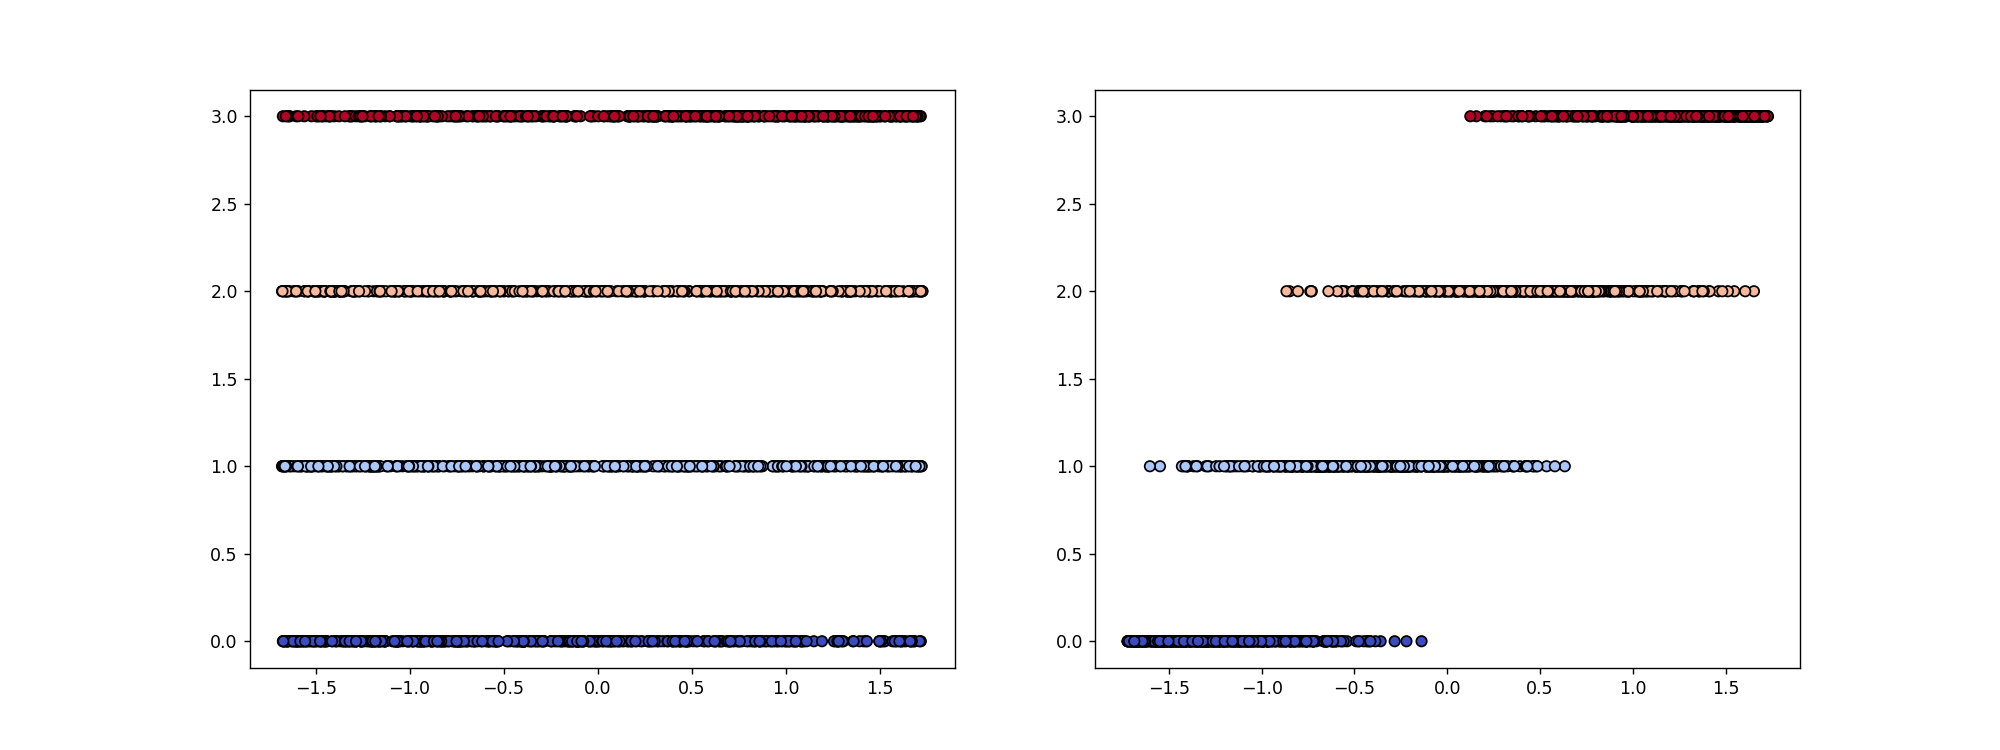

Correct classification Logistic              0.5 % of the data:  0.958
Correct classification SVM                   0.5 % of the data:  0.934
Correct classification Random Forest         0.5 % of the data:  0.791
Correct classification Gaussian Naive Bayes  0.5 % of the data:  0.789
Correct classification KNN                   0.5 % of the data:  0.885
Correct classification KN Centroids          0.5 % of the data:  0.768 

Correct classification Logistic              0.7 % of the data:  0.9533333333333334
Correct classification SVM                   0.7 % of the data:  0.9166666666666666
Correct classification Random Forest         0.7 % of the data:  0.7883333333333333
Correct classification Gaussian Naive Bayes  0.7 % of the data:  0.78
Correct classification KNN                   0.7 % of the data:  0.8883333333333333
Correct classification KN Centroids          0.7 % of the data:  0.7516666666666667 

Correct classification Logistic              0.8 % of the data:  0.9725
Correct 

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid

# Take the first two features. We could avoid this by using a two-dim dataset
X = X_train.values
y = y_train.values

n_classes = 4
    
fig, sub = plt.subplots(1, 2, figsize=(16,6))
sub[0].scatter(X[:,0], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')
sub[1].scatter(X[:,1], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')


particions = [0.5, 0.7, 0.8]

for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    
    #Creem el regresor logístic
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)

    # l'entrenem
    logireg.fit(x_t, y_t)

    print ("Correct classification Logistic             ", part, "% of the data: ", logireg.score(x_v, y_v))
    
    #Creem el regresor svm
    svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)

    # l'entrenem 
    svc.fit(x_t, y_t)
    
    probs = svc.predict_proba(x_v)
    print ("Correct classification SVM                  ", part, "% of the data: ", svc.score(x_v, y_v))
    
    #Creem el regresor de Random Forest
    rf= RandomForestClassifier(max_depth=2, random_state=0)

    # l'entrenem
    rf.fit(x_t, y_t)

    print ("Correct classification Random Forest        ", part, "% of the data: ", rf.score(x_v, y_v))
    
    #Creem el regresor de Naive Bayes Gaussià
    GNB = GaussianNB()

    # l'entrenem
    GNB.fit(x_t, y_t)

    print ("Correct classification Gaussian Naive Bayes ", part, "% of the data: ", GNB.score(x_v, y_v))
    
    #Creem el regresor KNN
    KNN = KNeighborsClassifier()

    # l'entrenem
    KNN.fit(x_t, y_t)

    print ("Correct classification KNN                  ", part, "% of the data: ", KNN.score(x_v, y_v))
    
    #Creem el regresor KN Centroids
    KNC= NearestCentroid()

    # l'entrenem
    KNC.fit(x_t, y_t)

    print ("Correct classification KN Centroids         ", part, "% of the data: ", KNC.score(x_v, y_v), "\n")

In [16]:
x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=0.7)
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(x_t, y_t)
probs = KNN.predict_proba(x_v)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def show_C_effect(x_t, y_t, C=1.0, gamma=0.7, degree=3):

    # import some data to play with
    # Take the first two features. We could avoid this by using a two-dim dataset
    X = x_t[:,:2]
    y = y_t
        
    
    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    # title for the plots
    titles = ('SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel', 
              'Random Forest',
              'Gaussian Naive Bayes',
              'KNN',
              'KN Centroids',
              'Logistic Regression',
              'DecisionTreeClassifier')

    #C = 1.0  # SVM regularization parameter
    models = (svm.SVC(kernel='linear', C=C),
              svm.LinearSVC(C=C, max_iter=1000000),
              svm.SVC(kernel='rbf', gamma=gamma, C=C),
              svm.SVC(kernel='poly', degree=degree, gamma='auto', C=C),
              RandomForestClassifier(max_depth = 10, random_state=0),
              GaussianNB(),
              KNeighborsClassifier(n_neighbors=3),
              NearestCentroid(),
              LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001),
              DecisionTreeClassifier())
    models = (clf.fit(X, y) for clf in models)

    plt.close('all')
    fig, sub = plt.subplots(5, 2, figsize=(14,20))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1 = X[:, 0], X[:, 1]
    
    xx, yy = make_meshgrid(X0, X1)

    for clf, title, ax in zip(models, titles, sub.flatten()):
        results = clf.predict(X)
        l = [y[i] == results[i] for i in range(len(y))]
        print('Acuracy of ',title, ':',(l.count(True))/len(y))
#         print(([y[i] == results[i] for i in range(len(y))]).count('True'))
       # print(y[0]==results[0])
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('Sepal length')
        ax.set_ylabel('Sepal width')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    plt.show()

<IPython.core.display.Javascript object>


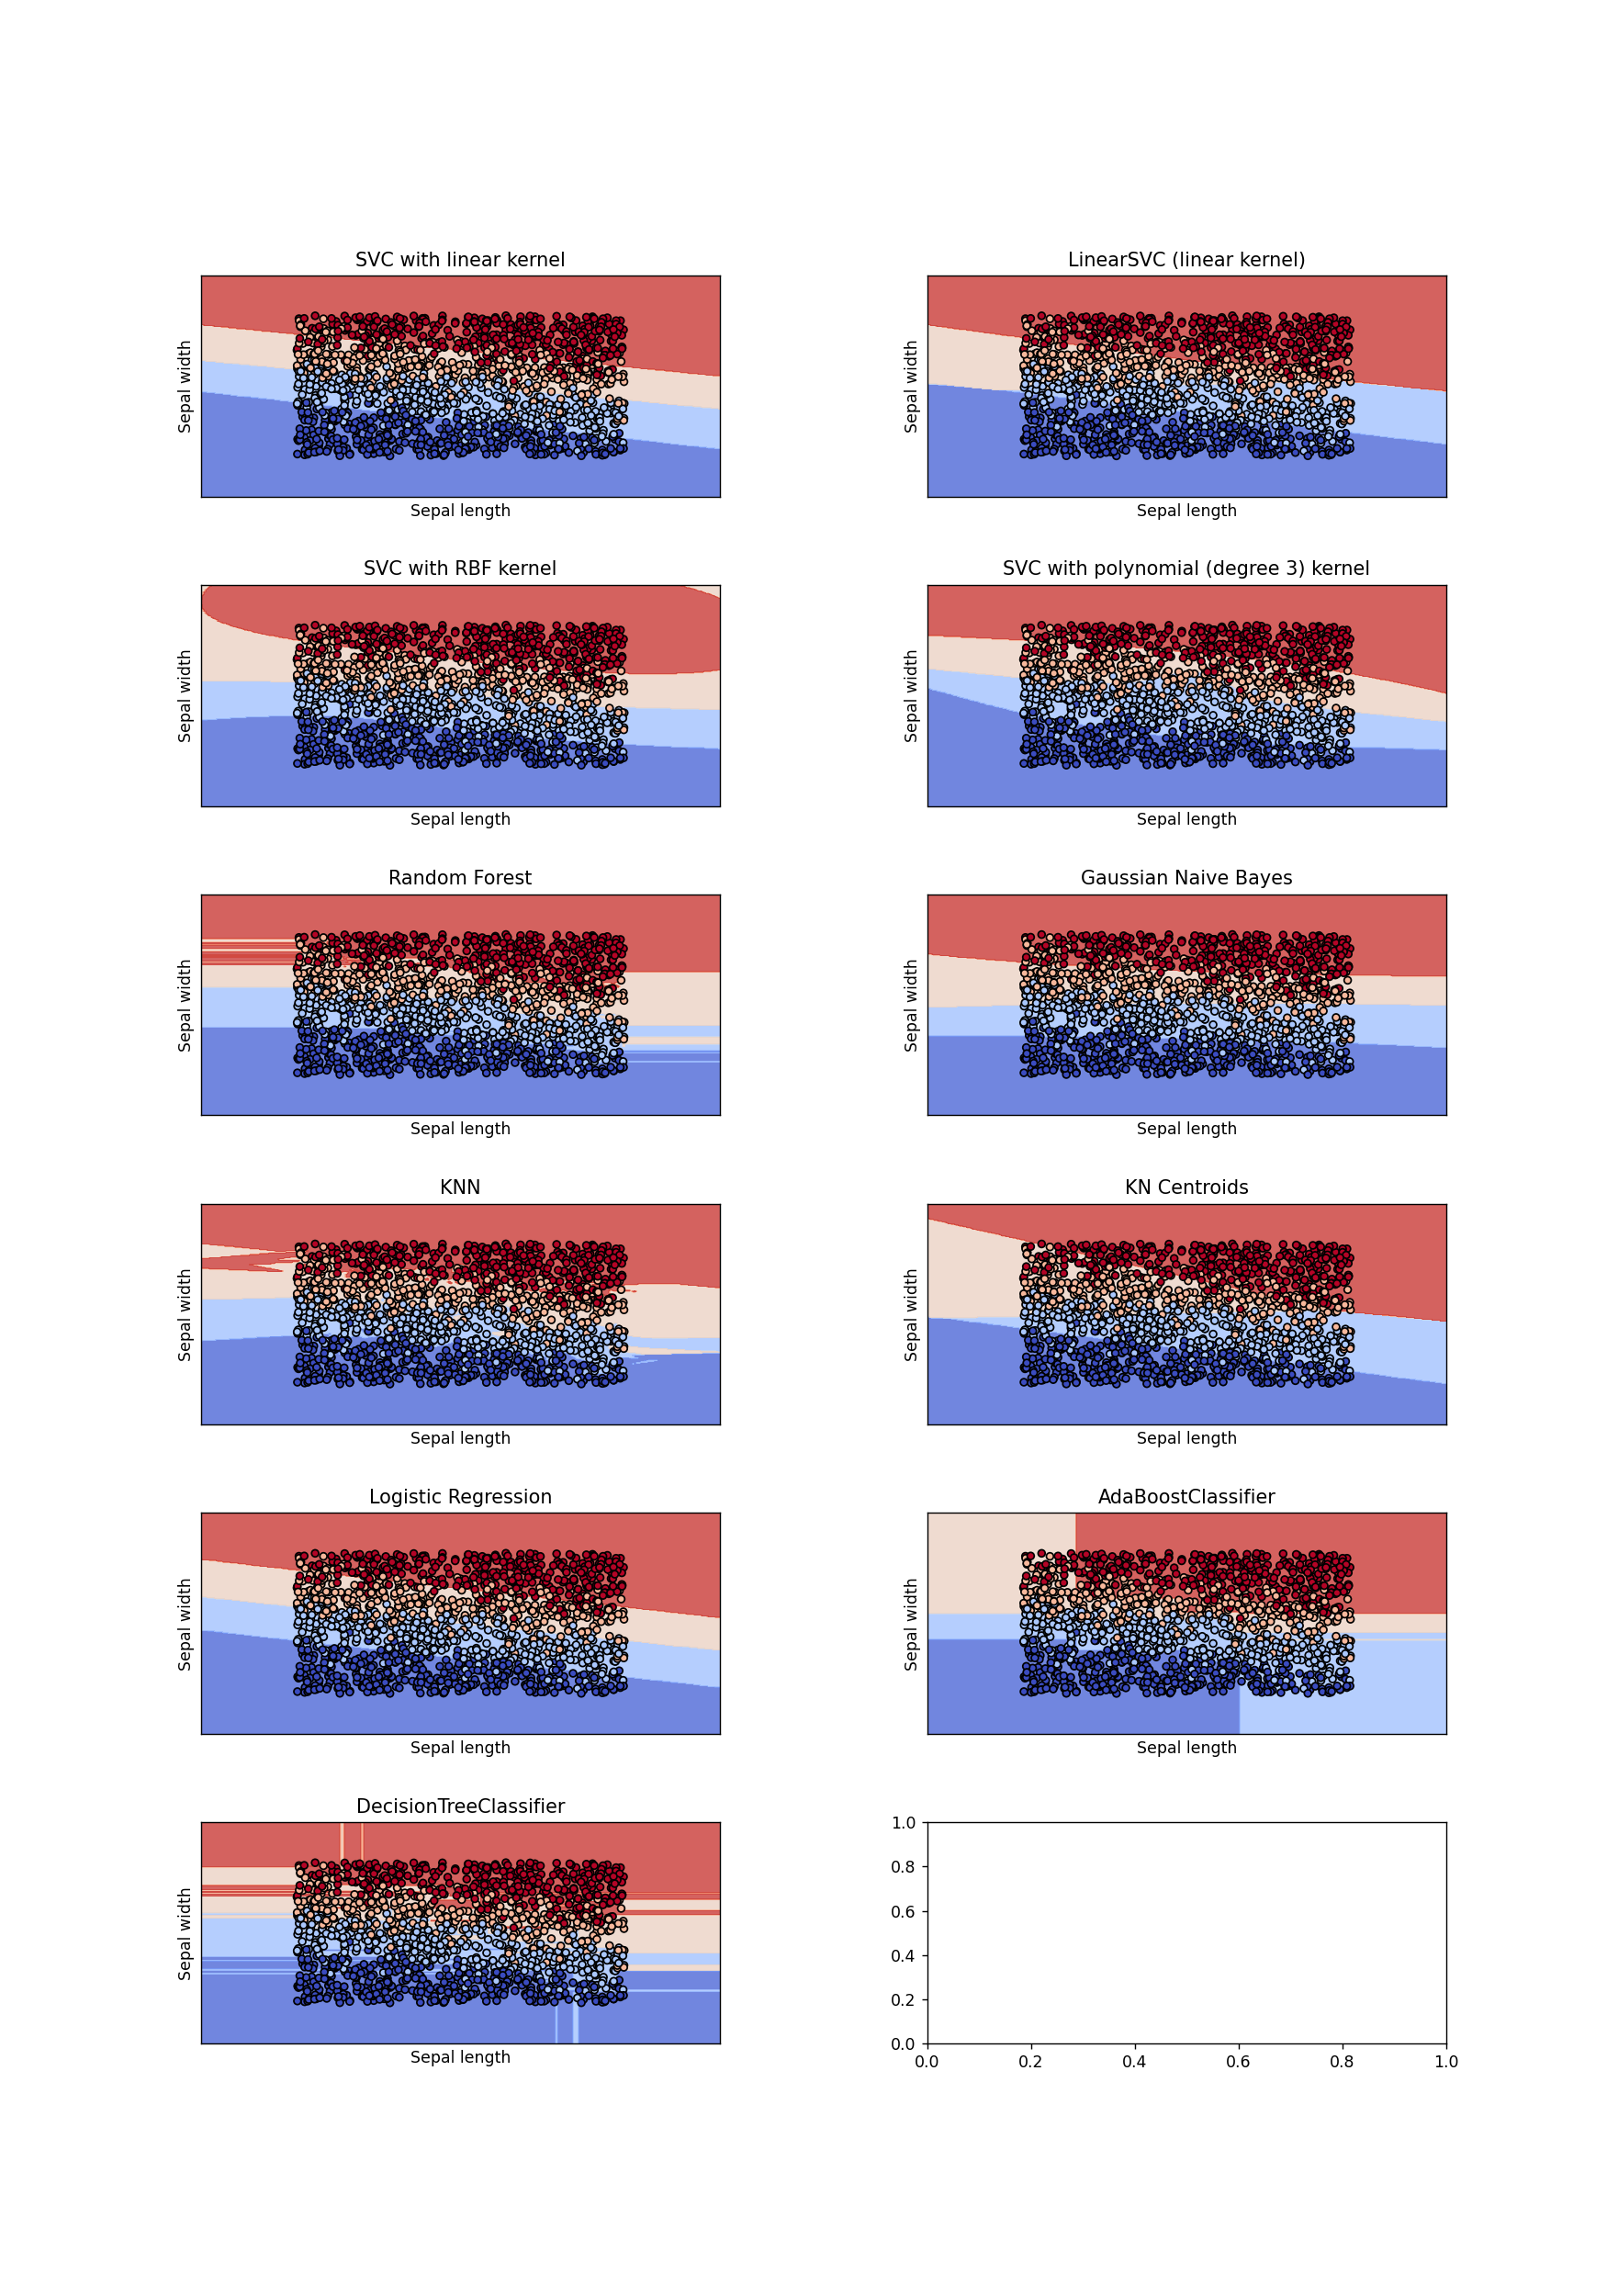

(1400,) (1400,)
Acuracy of  SVC with linear kernel : 0.8271428571428572
Acuracy of  LinearSVC (linear kernel) : 0.765
Acuracy of  SVC with RBF kernel : 0.8257142857142857
Acuracy of  SVC with polynomial (degree 3) kernel : 0.7828571428571428
Acuracy of  Random Forest : 0.9721428571428572
Acuracy of  Gaussian Naive Bayes : 0.7892857142857143
Acuracy of  KNN : 0.8814285714285715
Acuracy of  KN Centroids : 0.7792857142857142
Acuracy of  Logistic Regression : 0.8264285714285714
Acuracy of  AdaBoostClassifier : 0.7342857142857143
Acuracy of  DecisionTreeClassifier : 1.0


In [18]:
show_C_effect(x_t, y_t, C=0.1)

### 4. Crossvalidation
Un cop seleccionats quins models es volen testejar sobre les dades, s'han de poder evaluar correctament. Per aquests motius, haurem d'aprendre a cros-validar els resultats.
Reviseu la [documentació](https://scikit-learn.org/stable/modules/cross_validation.html) i escolliu quin tipus de crossvalidació pot ser l'adecuada pel vostre problema.

**Preguntes:**
* Per què és important cross-validar els resultats?
    - Per avaluar l'efectivitat del model, especialment en els casos on trobem overfitting. També és útil per determinar els hiperparàmetres del model (quins paràmetres donaran lloc a un error de test més baix).
* Separa la base de dades en el conjunt de train-test. Com de fiables serán els resultats obtinguts? En quins casos serà més fiable, si tenim moltes dades d'entrenament o poques?
    - Si tenim moltes dades d'entrenament ens podem trobar amb un overfitting i amb poques underfitting, el que és ideal es fer-ho en un rang 80-20 o 70-30 per a assegurar-nos que el nostre entrenament és efectiu.
* Quin tipus de K-fold heu escollit? Quants conjunts heu seleccionat (quina k)? Com afecta els diferents valors de k?
    - KFold, hem seleccionat 4 splits (l'accuracy més gran), veiem que no varia gaire l'accuracy, puja i baixa dins d'un interval molt petit
* Es viable o convenient aplicar `LeaveOneOut`?


In [19]:
#crossvalidation
from sklearn.model_selection import KFold

X = X[:,:2]
y = y

KNN = KNeighborsClassifier(n_neighbors=4)

n = 10
C=1.0
gamma = 0.7
degree = 3
max_value = 0
i = 1

for i in range(1, 151):


     results = {'SVC with linear kernel':[],
                   'LinearSVC (linear kernel)':[],
                   'SVC with RBF kernel':[],
                   'SVC with polynomial (degree 3) kernel':[], 
                   'Random Forest':[],
                   'Gaussian Naive Bayes':[],
                   'KNN':[],
                   'KN Centroids':[],
                  'Logistic Regression':[]}
        titles = ('SVC with linear kernel',
                   'LinearSVC (linear kernel)',
                   'SVC with RBF kernel',
                   'SVC with polynomial (degree 3) kernel', 
                   'Random Forest',
                   'Gaussian Naive Bayes',
                   'KNN',
                   'KN Centroids',
                  'Logistic Regression')

    for train, test in kf.split(X):
        xt, xv = X[train], X[test]
        yt, yv = y[train], y[test]

        print(xt.shape, xv.shape, yt.shape, yv.shape)
        models = (svm.SVC(kernel='linear', C=C),
                   svm.LinearSVC(C=C, max_iter=1000000),
                   svm.SVC(kernel='rbf', gamma=gamma, C=C),
                   svm.SVC(kernel='poly', degree=degree, gamma='auto', C=C),
                   RandomForestClassifier(max_depth=2, random_state=0),
                   GaussianNB(),
                   KNeighborsClassifier(n_neighbors=3),
                   NearestCentroid(),
                  LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001))
         models = (clf.fit(xt, yt) for clf in models)


    for clf, title in zip(models, titles):
        r = KNN.predict(xv)

        l = [yv[i] == r[i] for i in range(len(yv))]
        results.append(l.count(True)/len(yv))

        if sum(results)/i > max_value:
            max_value = sum(results)/i
            index = i
            print(i, ':', sum(results)/i)
        print("\n")

2 : 0.7985
15 : 0.7985149440766096


### 5. Metric Analysis
En aquest apartat ens centrarem en les mètriques de classificació ([documentació](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)).

**Preguntes:**
* A teoria, hem vist el resultat d'aplicar el `accuracy_score` sobre dades no balancejades. Podrieu explicar i justificar quina de les següents mètriques será la més adient pel vostre problema? `accuracy_score`, `f1_score` o `average_precision_score`.
    - Accuracy ---> F1 se centra en los datos de la clase positiva, mientras que el average de la clase negativa. En principio para datos balanceados, nos interesa mirar las dos partes y el accuracy_score lo hace.
* Mostreu la Precisió-Recall Curve i la ROC Curve. Quina és més rellevant pel vostre dataset? Expliqueu amb les vostres paraules, la diferencia entre una i altre [Pista](https://stats.stackexchange.com/questions/338826/auprc-vs-auc-roc)
    - ROC curves should be used when there are roughly equal numbers of observations for each class. Precision-Recall curves should be used when there is a moderate to large class imbalance. Per tant, per al nostre cas on tenim unes dades bastant balancejades amb un número molt similar de quantitat de telèfons per classe, és correcte fer servir la ROC curve
* Què mostra [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)? Quina métrica us fixareu per tal de optimitzar-ne la classificació pel vostre cas?
    - Ens retorna el precision, recall i F1 score per a cada classe

In [20]:
#implementación accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
KNN = KNeighborsClassifier()
KNN.fit(x_t, y_t)
print(accuracy_score(y_v, KNN.predict(x_v)))
print(f1_score(y_v, KNN.predict(x_v), average = None))
#average_precision_score(y_v, KNN.predict_proba(x_v))

0.855
[0.91304348 0.82428115 0.79872204 0.89261745]


<IPython.core.display.Javascript object>


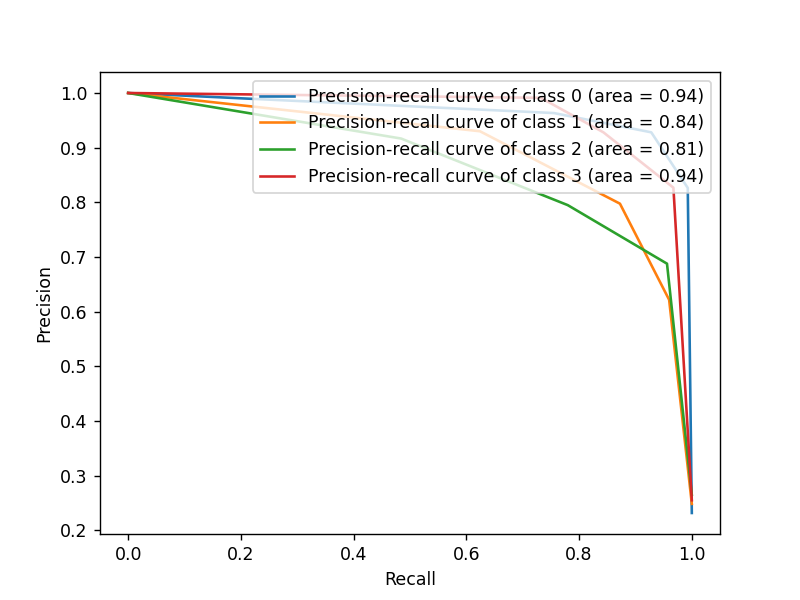

<IPython.core.display.Javascript object>


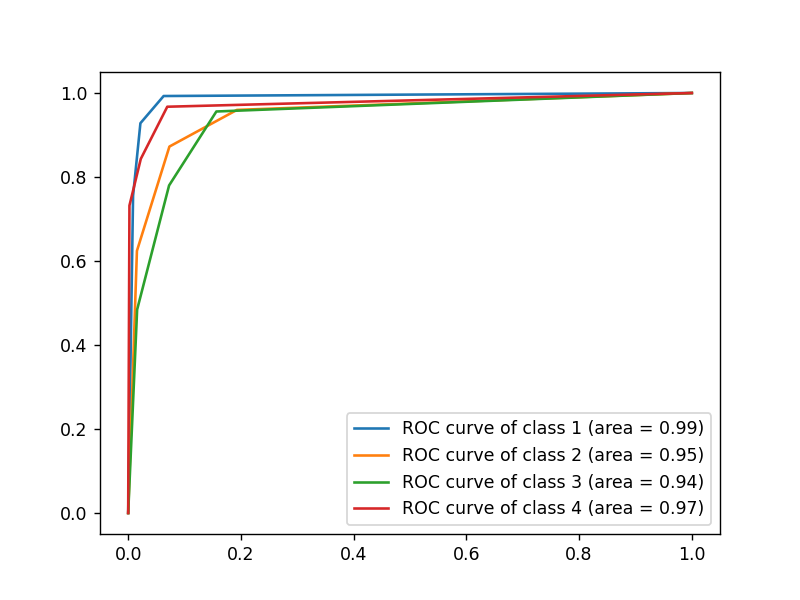

In [21]:
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc

# Compute Precision-Recall and plot curve
precision = {}
recall = {}
average_precision = {}
plt.figure()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_v == i, probs[:, i])
    average_precision[i] = average_precision_score(y_v == i, probs[:, i])

    plt.plot(recall[i], precision[i],
    label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

    
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_v == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i+1, roc_auc[i]))
plt.legend()

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_v, KNN.predict(x_v), labels=[0, 1, 2, 3]))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       139
           1       0.79      0.87      0.82       149
           2       0.81      0.79      0.80       159
           3       0.92      0.87      0.89       153

    accuracy                           0.85       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.86      0.85      0.86       600



The reported averages include macro average (averaging the unweighted mean per label), weighted average (averaging the support-weighted mean per label), and sample average (only for multilabel classification). Micro average (averaging the total true positives, false negatives and false positives) is only shown for multi-label or multi-class with a subset of classes, because it corresponds to accuracy otherwise and would be the same for all metrics.

### 6. Hyperparameter Search
El motiu d'aplicar crossvalidació durant l'entrenament és que ens permet conèixer quin serà el resultat esperat del nostre model un cop en producció, és a dir, com es comportarà sobre dades mai vistes abans.
A més, també ens permet optimitzar quins són els hiperparametres dels models que millor funcionaran en el futur test.

**Preguntes:**
* Quines formes de buscar el millor parametre heu trobat? Són costoses computacionalment parlant? [documentació](https://scikit-learn.org/stable/modules/grid_search.html)
* Si disposem de recursos limitats (per exemple, un PC durant 1 hora) quin dels dos métodes creieu que obtindrà millor resultat final?
* Existeixen altres mètodes de búsqueda més eficients ([scikit-optimize](https://scikit-optimize.github.io/stable/))?
* Feu la prova, i amb el model i el metode de crossvalidació escollit, configureu els diferents metodes de búsqueda per a que s'executin durant el mateix temps (i.e. depenent del problema, 0,5h-1 hora). Analitzeu quin ha arribat a una millor solució. (estimeu el temps que trigarà a fer 1 training, i aixi trobeu el número de intents que podeu fer en cada cas.)



In [23]:
KNN = KNeighborsClassifier()
KNN.fit(x_t, y_t)
results = KNN.predict(x_v)
print(classification_report(y_v, results))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       139
           1       0.79      0.87      0.82       149
           2       0.81      0.79      0.80       159
           3       0.92      0.87      0.89       153

    accuracy                           0.85       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.86      0.85      0.86       600



In [35]:
parameters = {}
parameters['SVC'] = {"kernel":['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
parameters['LinearSVC (linear kernel)'] = {}
parameters['Random Forest'] = {"max_depth":[None, 2, 10], "n_estimators":[i for i in range(1,2)], "bootstrap":[True, False]}
parameters['Gaussian Naive Bayes'] = {'var_smoothing': np.logspace(0,-9, 100)}
parameters['KNN'] = {"leaf_size":[i for i in range(1, 30)], "n_neighbors":[i for i in range(1, 50)], "p":[1,2]}
parameters['KN Centroids'] = {}
parameters['Logistic Regression'] = {"penalty":["none",  "l2"], "C": np.logspace(-4, 4, 20)}
parameters['Decision Tree'] = {'max_depth': [2, 3, 5, 10, 20], 'min_samples_leaf': [5, 10, 20, 50, 100], 'criterion': ["gini", "entropy"]}

k = 15
from sklearn.model_selection import GridSearchCV


models = (svm.SVC(),
              svm.LinearSVC(C=C, max_iter=1000000),
                
              RandomForestClassifier(),
              GaussianNB(),
              KNeighborsClassifier(),
              NearestCentroid(),
              LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001),
              DecisionTreeClassifier())

titles = ('SVC',
          'LinearSVC (linear kernel)',
          'Random Forest',
    'Gaussian Naive Bayes',
          'KNN',
          'KN Centroids',
          'Logistic Regression',
          'Decision Tree')

for clf, title in zip(models, titles):
    mod = GridSearchCV(clf, parameters[title], cv = k)
    mod.fit(x_t, y_t)
    results = mod.predict(x_v)
    l = [y_v[i] == results[i] for i in range(len(y_v))]
    print('Acuracy of ',title, ':',(l.count(True))/len(y_v))
    print(mod.best_params_)

    print(classification_report(y_v, results))


Acuracy of  Gaussian Naive Bayes : 0.82
{'var_smoothing': 0.43287612810830584}
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       139
           1       0.68      0.69      0.69       149
           2       0.73      0.70      0.72       159
           3       0.97      0.93      0.95       153

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600

Acuracy of  KNN : 0.9033333333333333
{'leaf_size': 1, 'n_neighbors': 38, 'p': 1}
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       139
           1       0.84      0.91      0.87       149
           2       0.86      0.87      0.86       159
           3       0.99      0.88      0.93       153

    accuracy                           0.90       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91  

C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\gerar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gerar\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.50572714        nan 0.53501868        nan 0.6136277
        nan 0.67356821        nan 0.7450164         nan 0.80929612
        nan 0.88212461        nan 0.93284527        nan 0.95138412
        nan 0.95640204        nan 0.95711889        nan 0.95855258
        nan 0.95998627        nan 0.9592618         nan 0.95925418
        n

Acuracy of  Logistic Regression : 0.9566666666666667
{'C': 545.5594781168514, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       139
           1       0.94      0.97      0.95       149
           2       0.94      0.93      0.93       159
           3       0.97      0.95      0.96       153

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600

Acuracy of  Decision Tree : 0.8416666666666667
{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5}
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       139
           1       0.81      0.75      0.78       149
           2       0.78      0.85      0.81       159
           3       0.92      0.87      0.90       153

    accuracy                           0.84       600
   macro avg       0.84      0.84  